In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from Functions import *

In [5]:
credit = pd.read_csv('F:\\Downloads\\dseb-63-data-preparation-final-project\\dseb63_final_project_DP_dataset\\dseb63_credit_card_balance.csv')

In [6]:
credit.head()

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,...,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,87788
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,...,16809.210,0.0,0,0.0,0.0,18.0,Active,0,0,87788
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,...,27577.890,0.0,0,0.0,0.0,16.0,Active,0,0,87788
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,...,65609.235,0.0,0,0.0,0.0,63.0,Active,0,0,87788
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,...,70475.850,4.0,4,0.0,0.0,41.0,Active,0,0,87788


SK_ID_PREV: ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit),hashed

SK_ID_CURR: ID of loan in our sample,hashed

MONTHS_BALANCE: Month of balance relative to application date (-1 means the freshest balance date),time only relative to the application

AMT_BALANCE: Balance during the month of previous credit,

AMT_CREDIT_LIMIT_ACTUAL: Credit card limit during the month of the previous credit,

AMT_DRAWINGS_ATM_CURRENT: Amount drawing at ATM during the month of the previous credit,

AMT_DRAWINGS_CURRENT: Amount drawing during the month of the previous credit,

AMT_DRAWINGS_OTHER_CURRENT: Amount of other drawings during the month of the previous credit,

AMT_DRAWINGS_POS_CURRENT: Amount drawing or buying goods during the month of the previous credit,

AMT_INST_MIN_REGULARITY: Minimal installment for this month of the previous credit,

AMT_PAYMENT_CURRENT: How much did the client pay during the month on the previous credit,

AMT_PAYMENT_TOTAL_CURRENT: How much did the client pay during the month in total on the previous credit,

AMT_RECEIVABLE_PRINCIPAL: Amount receivable for principal on the previous credit,

AMT_RECIVABLE: Amount receivable on the previous credit,

AMT_TOTAL_RECEIVABLE: Total amount receivable on the previous credit,

CNT_DRAWINGS_ATM_CURRENT: Number of drawings at ATM during this month on the previous credit,

CNT_DRAWINGS_CURRENT: Number of drawings during this month on the previous credit,

CNT_DRAWINGS_OTHER_CURRENT: Number of other drawings during this month on the previous credit,

CNT_DRAWINGS_POS_CURRENT: Number of drawings for goods during this month on the previous credit,

CNT_INSTALMENT_MATURE_CUM: Number of paid installments on the previous credit,

NAME_CONTRACT_STATUS: Contract Status (Active, Signed,...) on the previous credit,

SK_DPD: DPD (Days past due) during the month on the previous credit,

SK_DPD_DEF: DPD (Days past due) during the month with tolerance (debts with low loan amounts are ignored) of the previous credit.

# Pre check overall Dataframe

In [7]:
credit_check = pre_check_tool(credit)
credit_check.split_data()

In [8]:
# Check null percent
credit_check.check_per_null()

,number_missing,percent_missing
SK_ID_PREV,0,0.000000
MONTHS_BALANCE,0,0.000000
AMT_BALANCE,0,0.000000
AMT_CREDIT_LIMIT_ACTUAL,0,0.000000
AMT_DRAWINGS_ATM_CURRENT,605754,18.765817
AMT_DRAWINGS_CURRENT,0,0.000000
AMT_DRAWINGS_OTHER_CURRENT,605754,18.765817
AMT_DRAWINGS_POS_CURRENT,605754,18.765817
AMT_INST_MIN_REGULARITY,264384,8.190423
AMT_PAYMENT_CURRENT,620093,19.210029


In [9]:
# find cols that have null > 90%
print(credit_check.find_null_cols(0.9))

Index([], dtype='object')


NO COLUMNS HAVE NULL VALUES > 90% -> SO WE'RE KEEPING THE DATASET AS IT IS FOR NOW

In [10]:
#duplicate check
credit.duplicated().sum()

0

In [11]:
# valid value
## Num data
credit_check.check_value_num()
print('\n\n\n')

## cat data
credit_check.check_value_cat()

SK_ID_PREV  has     >0 3227965,  =0 0  ,   <0 0,    nan: 0,   other values: 0
MONTHS_BALANCE  has     >0 0,  =0 0  ,   <0 3227965,    nan: 0,   other values: 0
AMT_BALANCE  has     >0 1440575,  =0 1785423  ,   <0 1967,    nan: 0,   other values: 0
AMT_CREDIT_LIMIT_ACTUAL  has     >0 2598403,  =0 629562  ,   <0 0,    nan: 0,   other values: 0
AMT_DRAWINGS_ATM_CURRENT  has     >0 365140,  =0 2257070  ,   <0 1,    nan: 605754,   other values: 0
AMT_DRAWINGS_CURRENT  has     >0 522034,  =0 2705929  ,   <0 2,    nan: 0,   other values: 0
AMT_DRAWINGS_OTHER_CURRENT  has     >0 10847,  =0 2611364  ,   <0 0,    nan: 605754,   other values: 0
AMT_DRAWINGS_POS_CURRENT  has     >0 218149,  =0 2404062  ,   <0 0,    nan: 605754,   other values: 0
AMT_INST_MIN_REGULARITY  has     >0 1374847,  =0 1588734  ,   <0 0,    nan: 264384,   other values: 0
AMT_PAYMENT_CURRENT  has     >0 2279241,  =0 328631  ,   <0 0,    nan: 620093,   other values: 0
AMT_PAYMENT_TOTAL_CURRENT  has     >0 1419959,  =0 180800

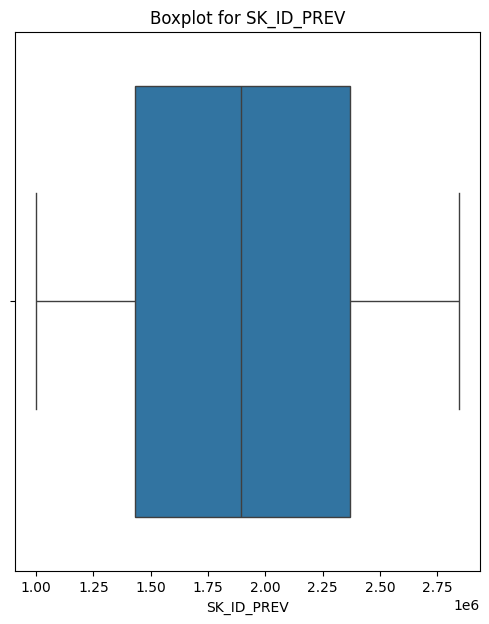

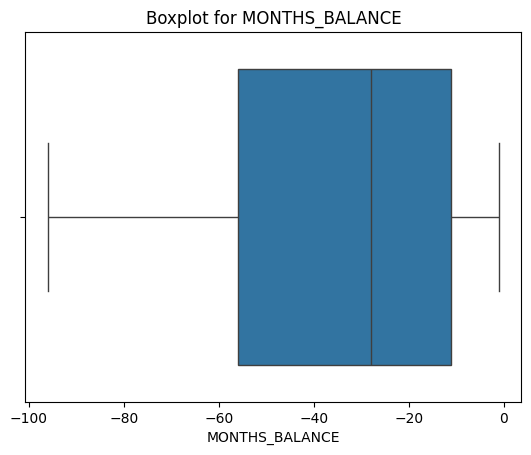

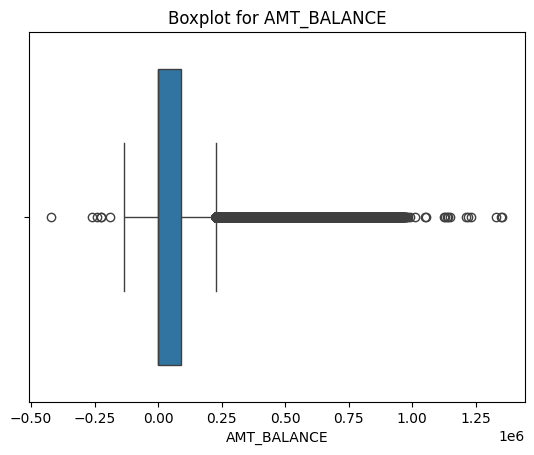

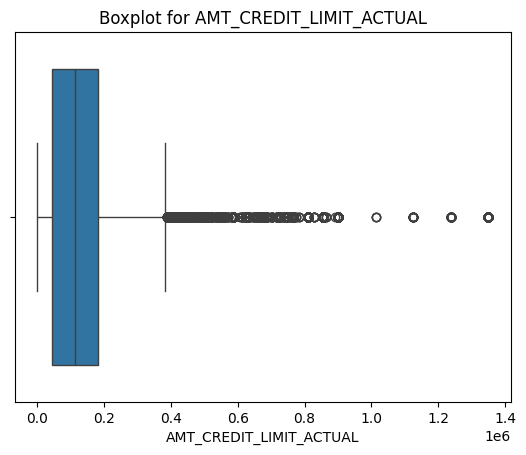

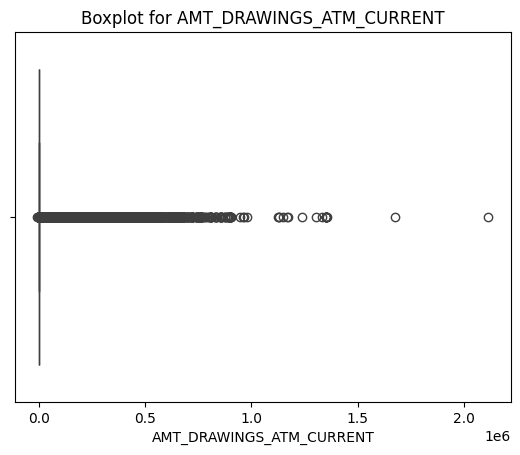

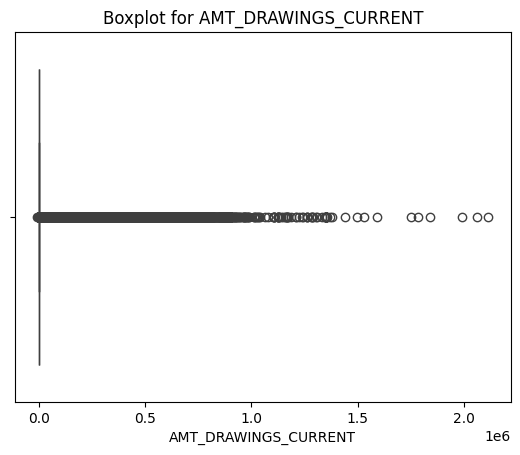

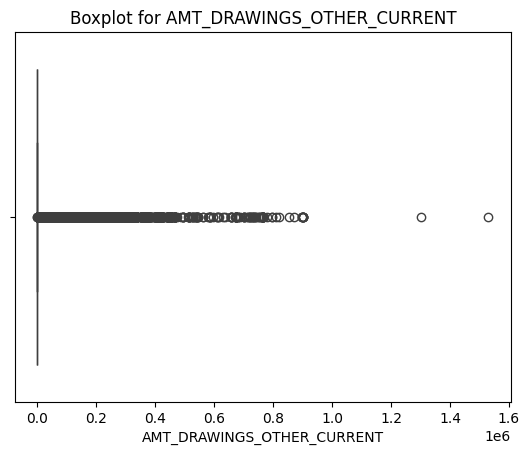

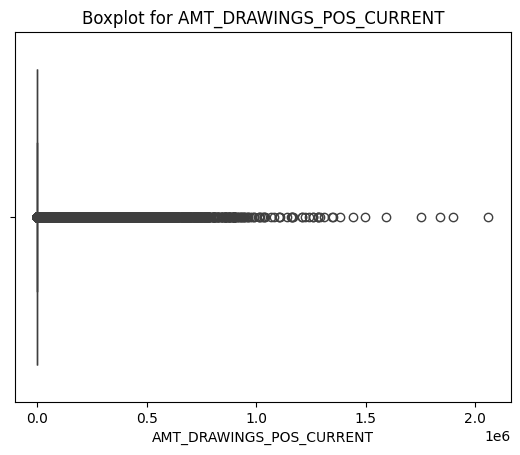

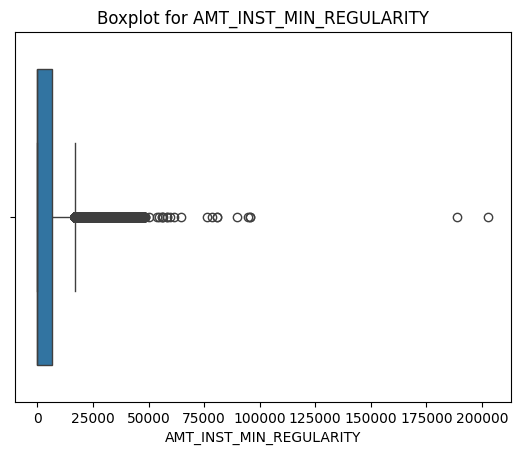

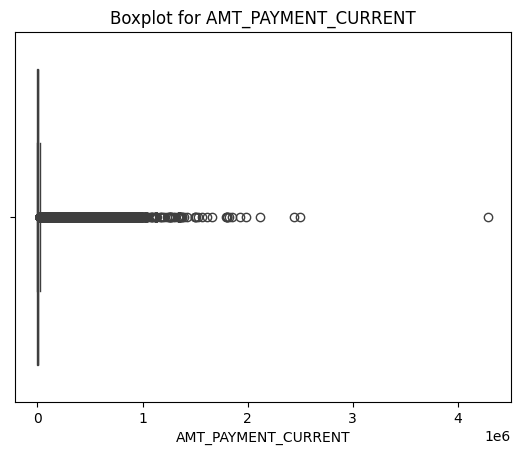

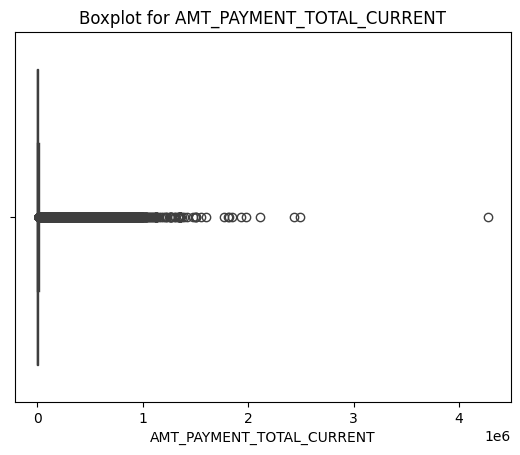

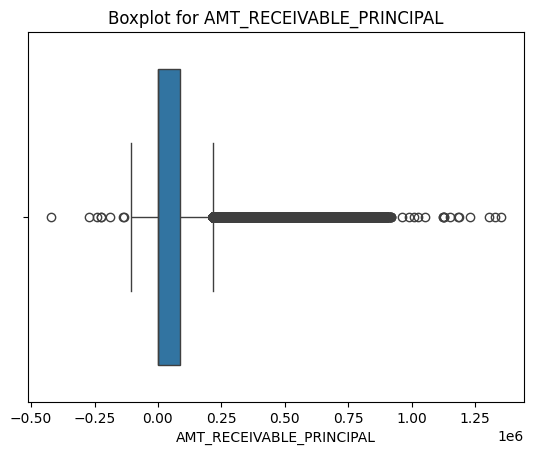

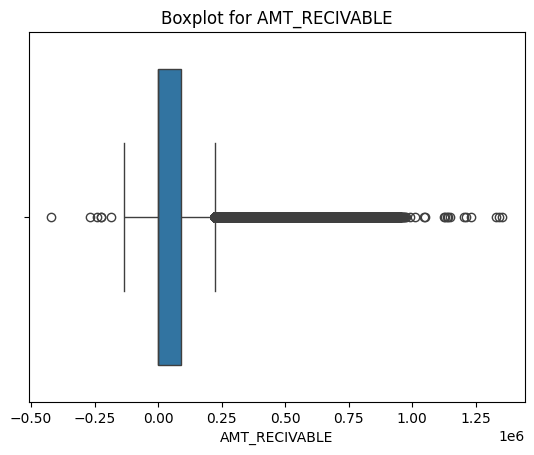

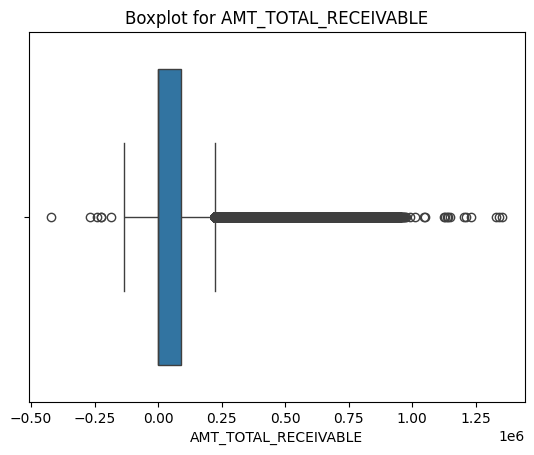

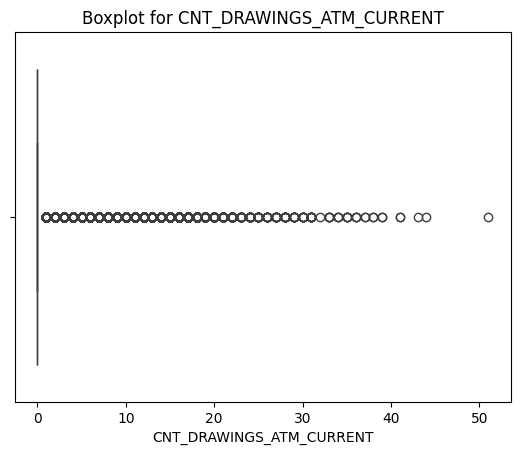

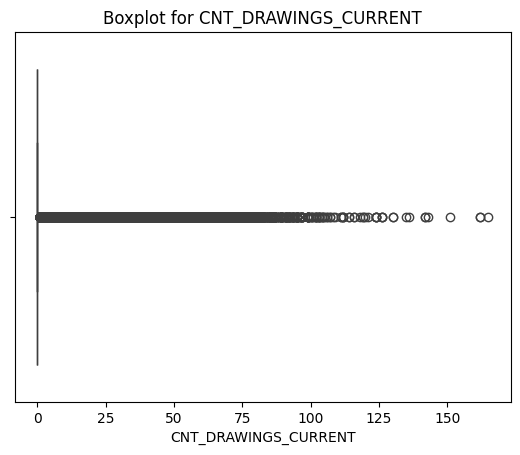

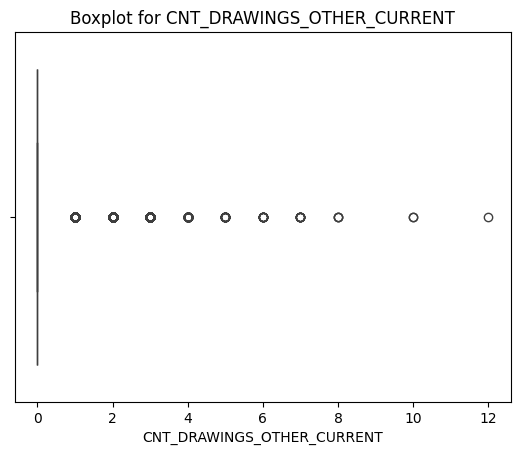

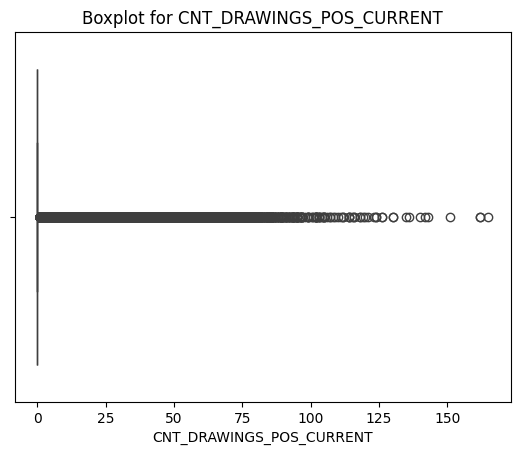

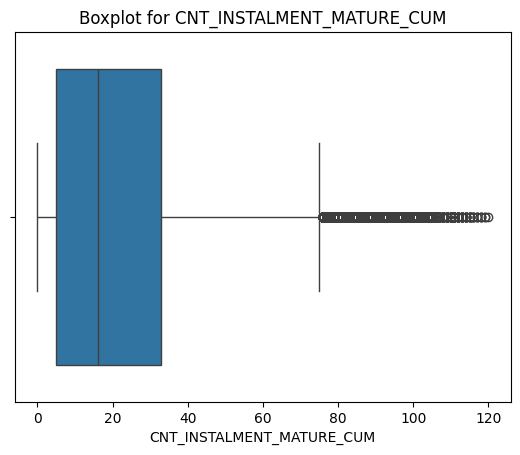

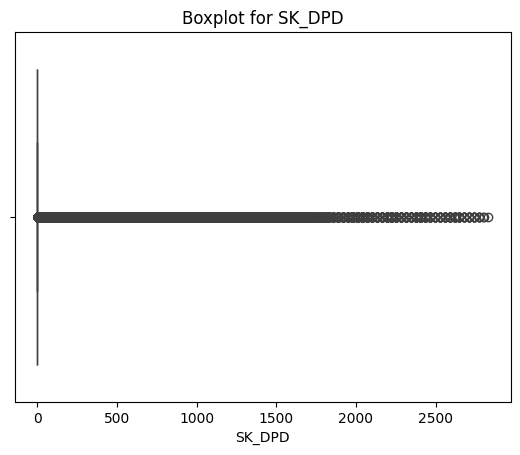

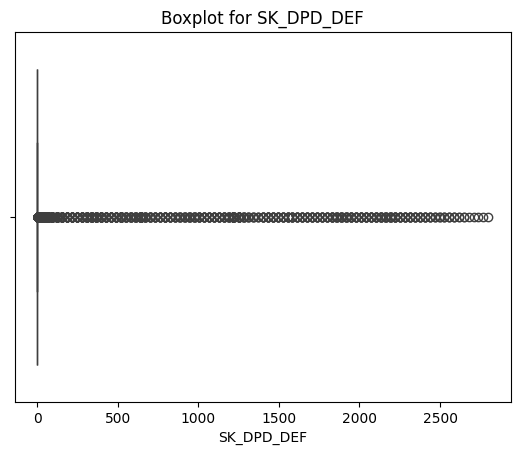

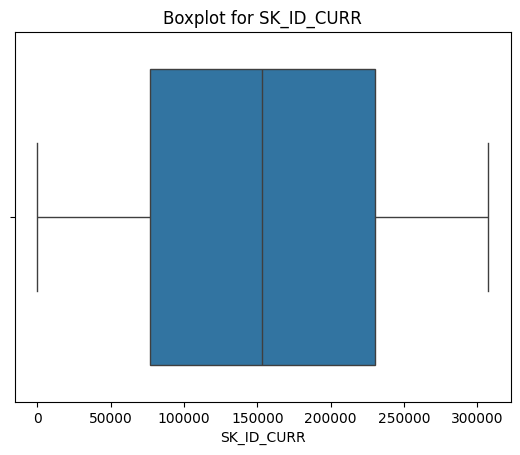

In [12]:
# Outliers 
credit_check.show_outliers()

In [13]:
credit_check.catdf

,NAME_CONTRACT_STATUS
0,Active
1,Active
2,Active
3,Active
4,Active
...,...
3227960,Active
3227961,Active
3227962,Active
3227963,Active


In [ ]:
credit_check.dist_catchart()

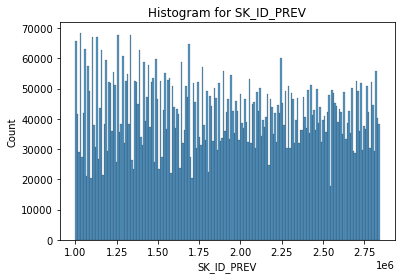

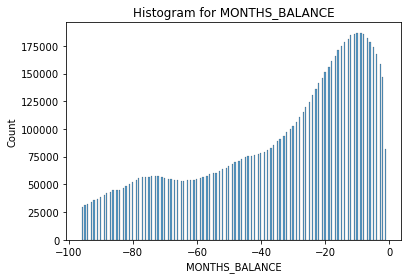

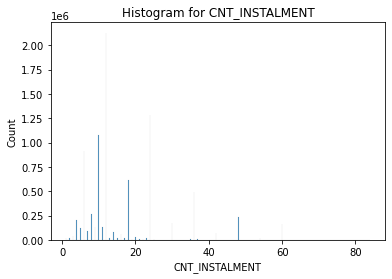

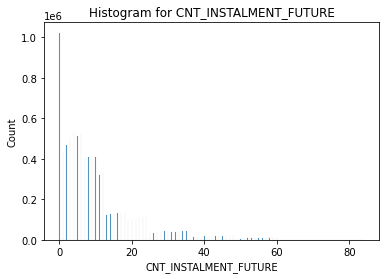

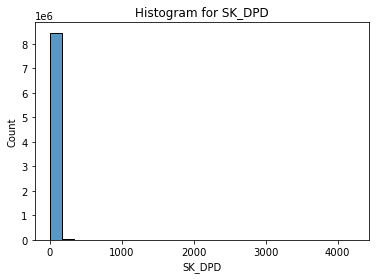

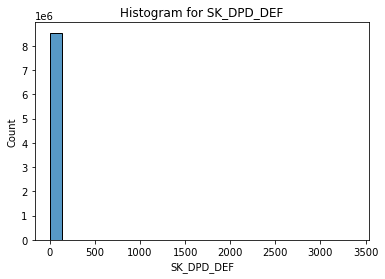

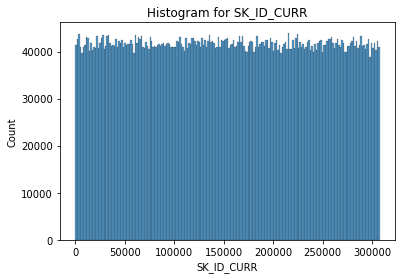

In [ ]:
credit_check.dist_numchart()

# Data Exploration

# EDA Internal

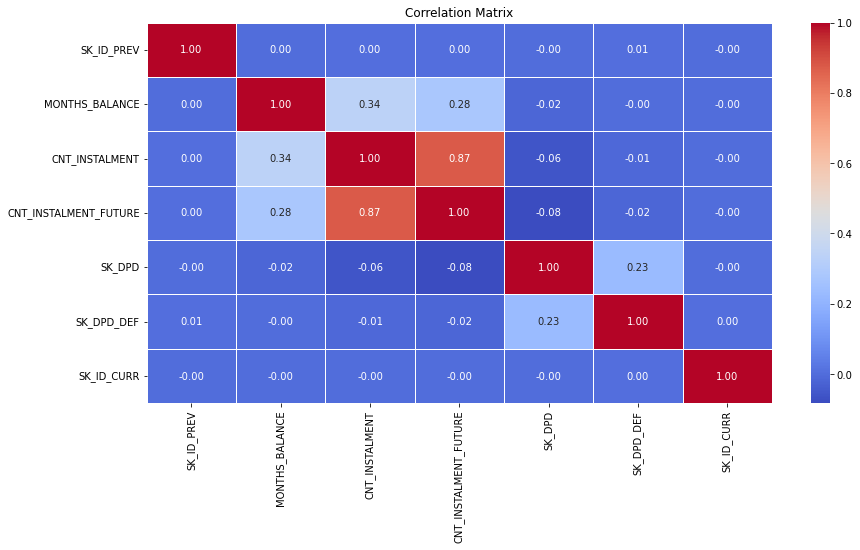

In [ ]:
num = credit_check.numdf
# Correlation
draw_corr(num)

### Features that have high correlation: 
* CNT_INSTALMENT - CNT_INSTALMENT_FUTURE

In [21]:
credit["NAME_CONTRACT_STATUS"].value_counts(normalize= True) * 100

NAME_CONTRACT_STATUS
Active           96.552255
Completed         3.098887
Signed            0.307903
Demand            0.026116
Sent proposal     0.014250
Refused           0.000434
Approved          0.000155
Name: proportion, dtype: float64

# EDA External

In [16]:
app_train = pd.read_csv('F:\\Downloads\\dseb-63-data-preparation-final-project\\dseb63_final_project_DP_dataset\\dseb63_application_train.csv')
app_train = app_train[['SK_ID_CURR','TARGET']]

In [17]:
merge_table = pd.merge(credit,app_train,on='SK_ID_CURR',how='left')
merge_table.head()

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR,TARGET
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,...,1.0,1,0.0,0.0,69.0,Active,0,0,87788,1.0
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,...,0.0,0,0.0,0.0,18.0,Active,0,0,87788,1.0
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,...,0.0,0,0.0,0.0,16.0,Active,0,0,87788,1.0
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,...,0.0,0,0.0,0.0,63.0,Active,0,0,87788,1.0
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,...,4.0,4,0.0,0.0,41.0,Active,0,0,87788,1.0


In [18]:
credit_filter = merge_table.sort_values(by=['MONTHS_BALANCE']).groupby(["SK_ID_CURR", "SK_ID_PREV"]).last().reset_index()
